<a href="https://colab.research.google.com/github/morfant/TF_study/blob/master/TF_week_01_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

# print(tf.__version__)


fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plt.figure()
# plt.imshow(train_images[1])
# plt.colorbar()
# plt.grid(False)
# plt.show()


train_images = train_images / 255.0
test_images = test_images / 255.0

# plt.figure(figsize=(10,10))
# for i in range(25):
#   plt.subplot(5, 5, i + 1)
#   plt.xticks([])
#   plt.yticks([])
#   plt.grid(False)
#   plt.imshow(train_images[i], cmap=plt.cm.binary)
#   plt.xlabel(class_names[train_labels[i]])
# plt.show()
  



Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5037 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3708 - accuracy: 0.8663
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3330 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3102 - accuracy: 0.8864
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2916 - accuracy: 0.8925
313/313 - 0s - loss: 0.3456 - accuracy: 0.8738

테스트 정확도: 0.8737999796867371


In [48]:
# train model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.8224
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3767 - accuracy: 0.8641
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8785
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3157 - accuracy: 0.8838
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2960 - accuracy: 0.8912


In [50]:
# test model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3519 - accuracy: 0.8746

테스트 정확도: 0.8745999932289124


In [57]:
predictions = model.predict(test_images)

predictions[0]

class_names[np.argmax(predictions[0])]

class_names[test_labels[0]]

'Ankle boot'

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
  
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')







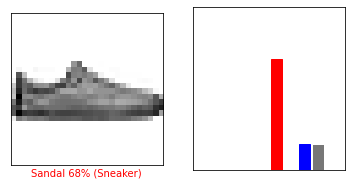

In [99]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

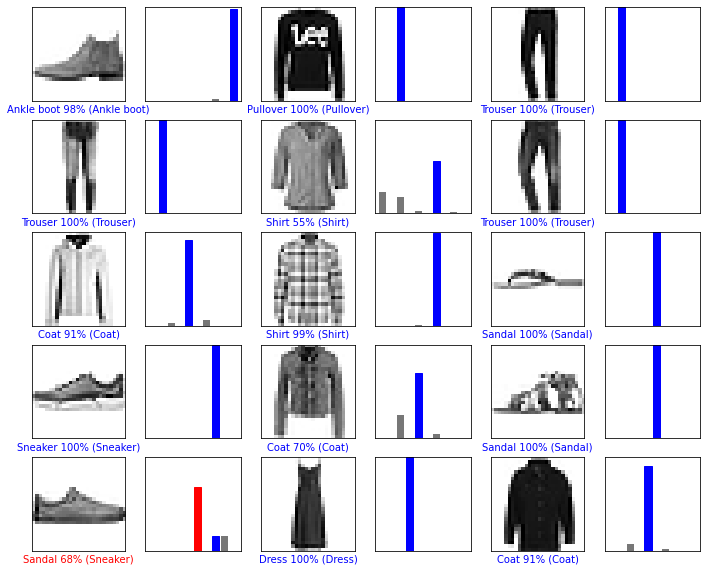

In [107]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[2.6843700e-06 1.3979320e-09 5.2899480e-07 2.1074502e-08 1.0385811e-06
  3.9683529e-03 1.3432561e-06 1.8763371e-02 3.2362302e-06 9.7725940e-01]]


9

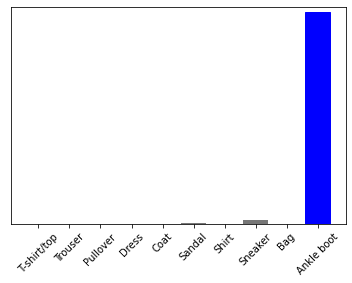

In [119]:

img = test_images[0]

print(img.shape)


img = (np.expand_dims(img, 0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

np.argmax(predictions_single[0])
